In [1]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
import os

In [2]:
nodos = []
hijos = []

In [3]:
def generar_hanoi_arbol(n, origen, destino, auxiliar, padre=None):
    if n == 1:
        nombre = f"Mover de {origen} a {destino}"
        nodos.append(nombre)
        hijos.append(padre)
    else:
        nombre1 = f"({n-1}) {origen}->{auxiliar}"
        nombre2 = f"Mover de {origen} a {destino}"
        nombre3 = f"({n-1}) {auxiliar}->{destino}"

        nodos.append(nombre1)
        hijos.append(padre)

        nodos.append(nombre2)
        hijos.append(nombre1)

        nodos.append(nombre3)
        hijos.append(nombre2)

        generar_hanoi_arbol(n-1, origen, auxiliar, destino, padre=nombre1)
        generar_hanoi_arbol(n-1, auxiliar, destino, origen, padre=nombre3)

# Generar el árbol de decisiones para 3 discos
generar_hanoi_arbol(3, 'A', 'C', 'B')

In [4]:
X = [[i] for i in range(len(nodos))]
y = nodos

In [5]:
modelo_dtr = DecisionTreeClassifier(random_state=0)

In [10]:
modelo_dtr.fit(X, y)

DecisionTreeClassifier(random_state=0)

In [11]:
export_graphviz(
    modelo_dtr,
    out_file="hanoi_tree.dot",
    feature_names=["Pasos"],
    class_names=y,
    rounded=True,
    filled=True
)

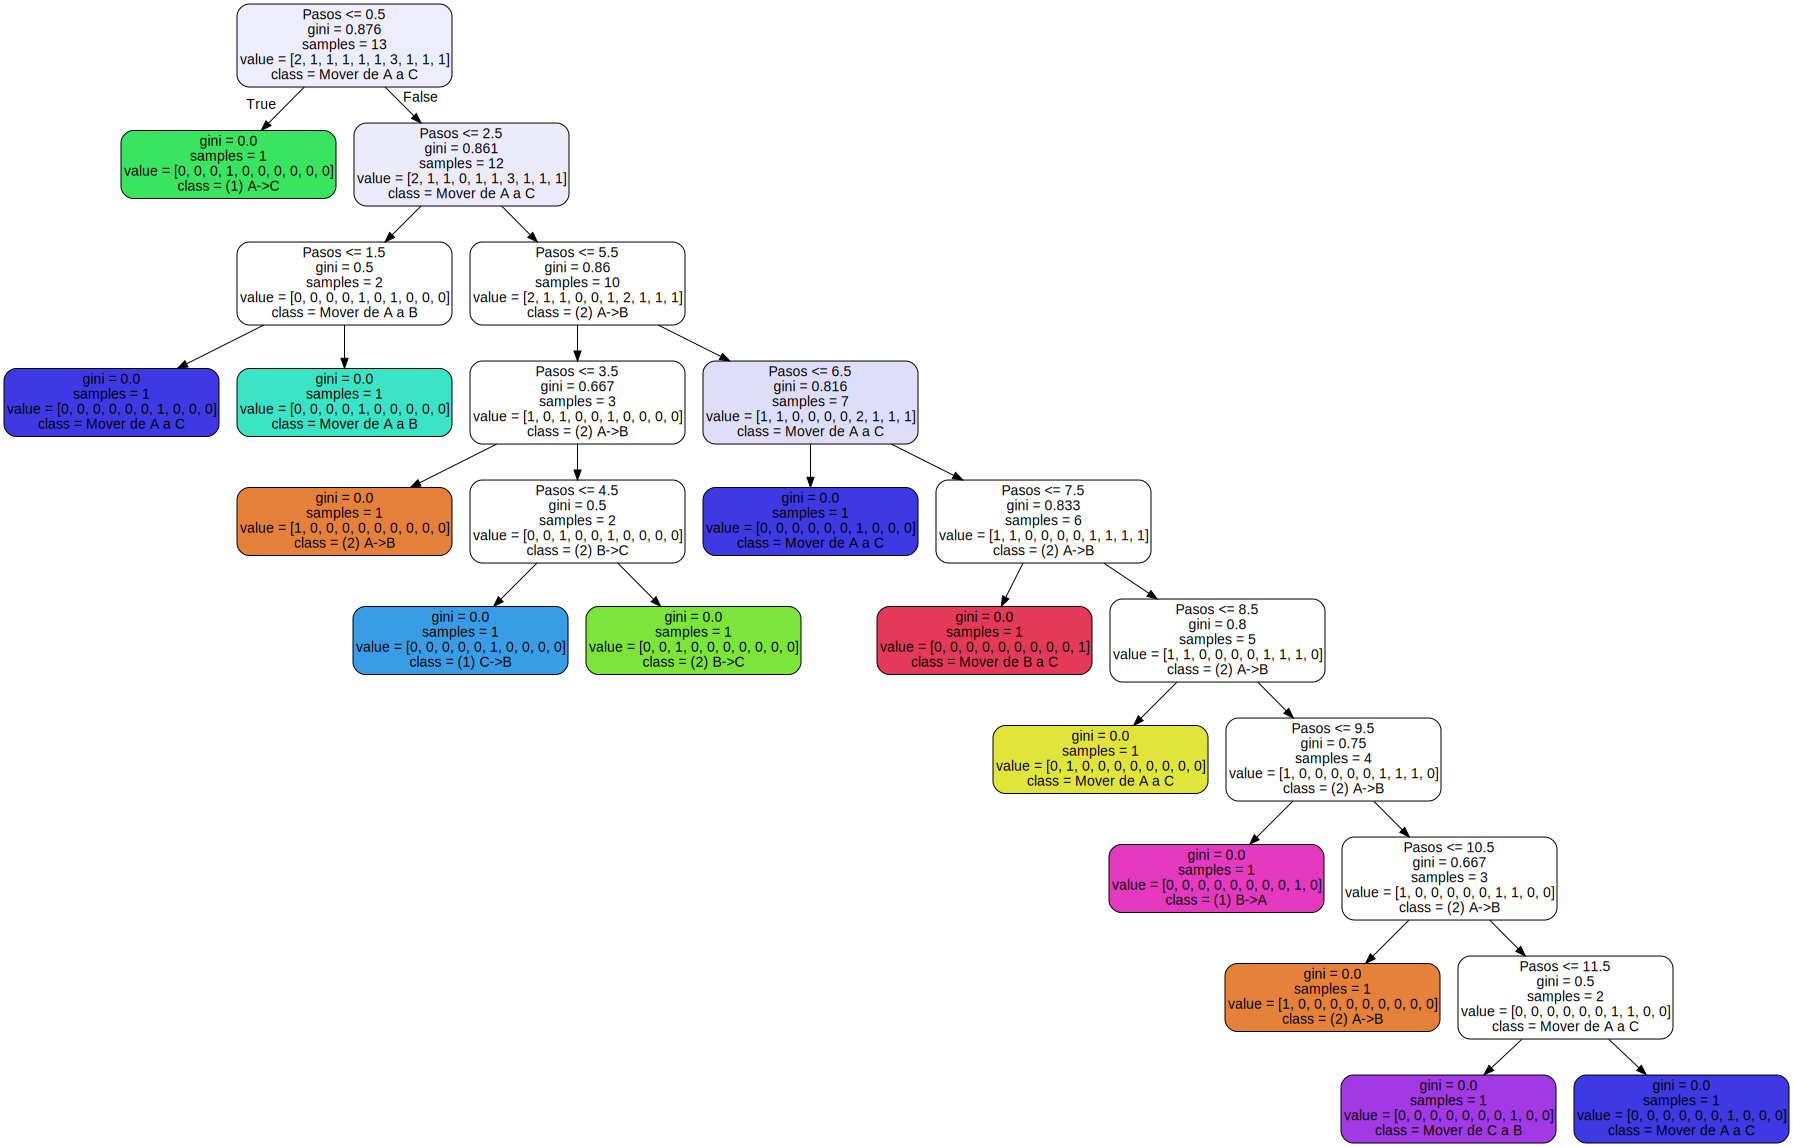

In [12]:
Source.from_file("hanoi_tree.dot")